# Task I.1

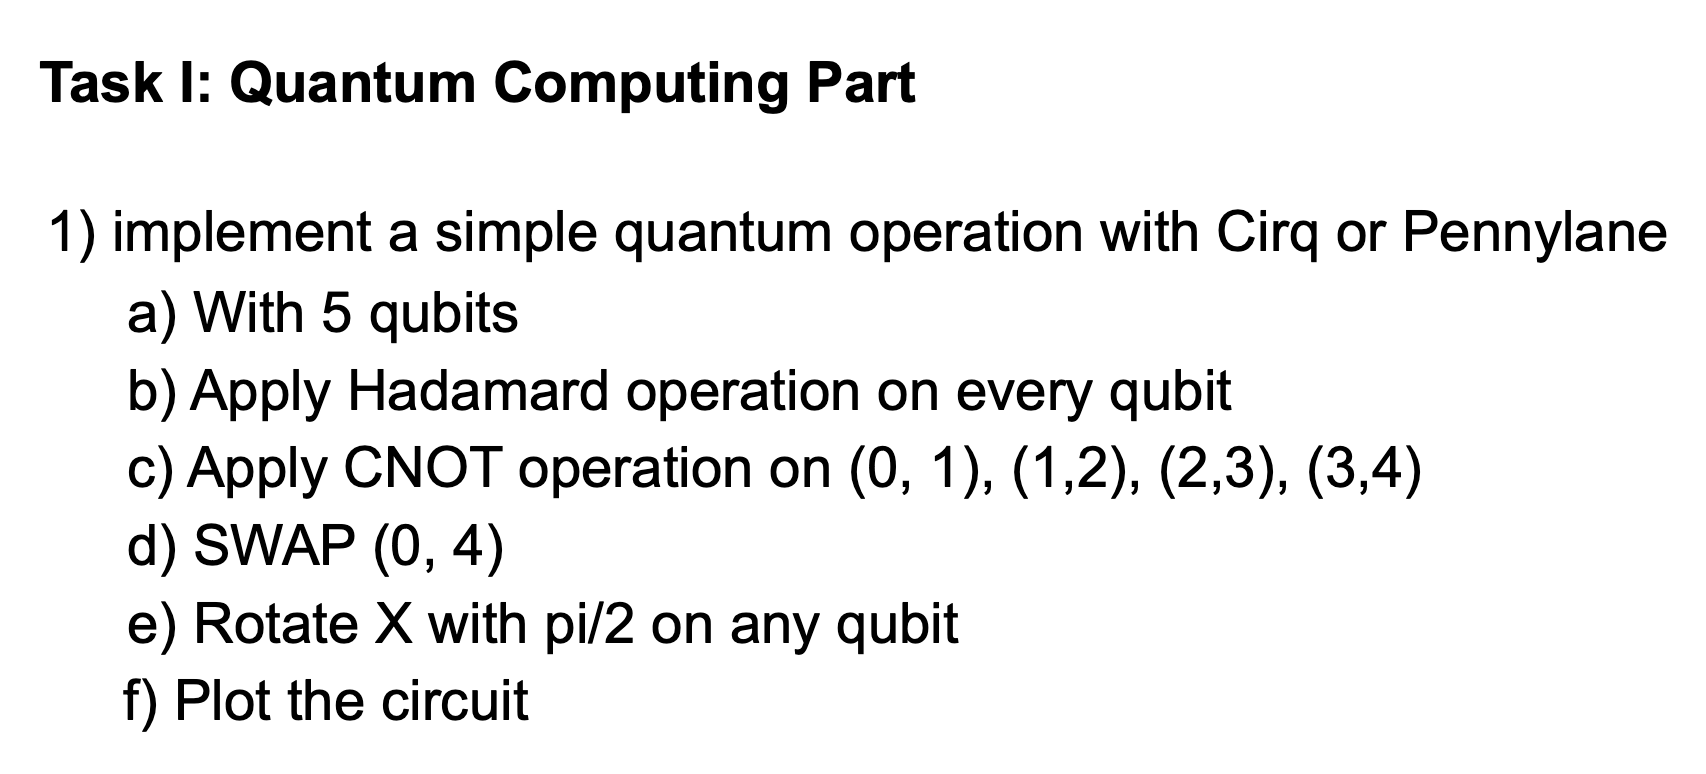

In [ ]:
!pip install -q pennylane qiskit pylatexenc

import pennylane as qml
from pennylane import numpy as np


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 KB 18.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 69.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 KB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 KB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

(<Figure size 720x432 with 1 Axes>, <Axes: >)


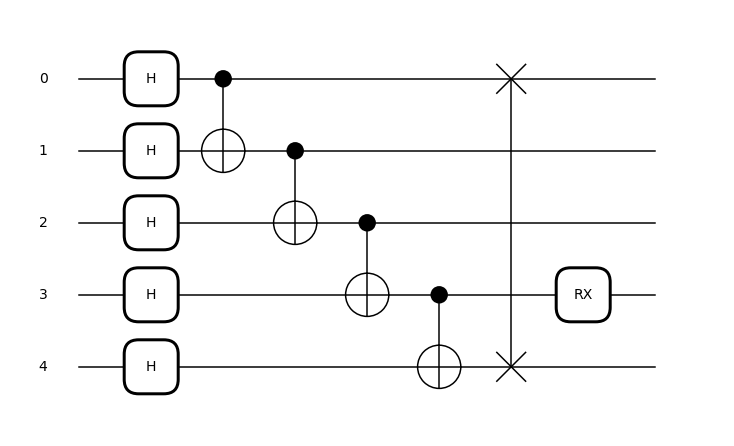

In [ ]:
def circuit():
  # applying Hadamard operation of every qubit
  for i in range(5):
    qml.Hadamard(i)
  # applying CNOT operation on (0, 1), (1,2), (2,3), (3,4)
  for i in range(4):
    qml.CNOT([i, i+1])

  # SWAP (0,4)
  qml.SWAP([0,4])

  # Rotate X with pi/2 on any qubit (random_wire)
  random_wire = np.random.randint(5)
  qml.RX(np.pi/2, wires= random_wire)

print(qml.draw_mpl(circuit)())

# Task I.2

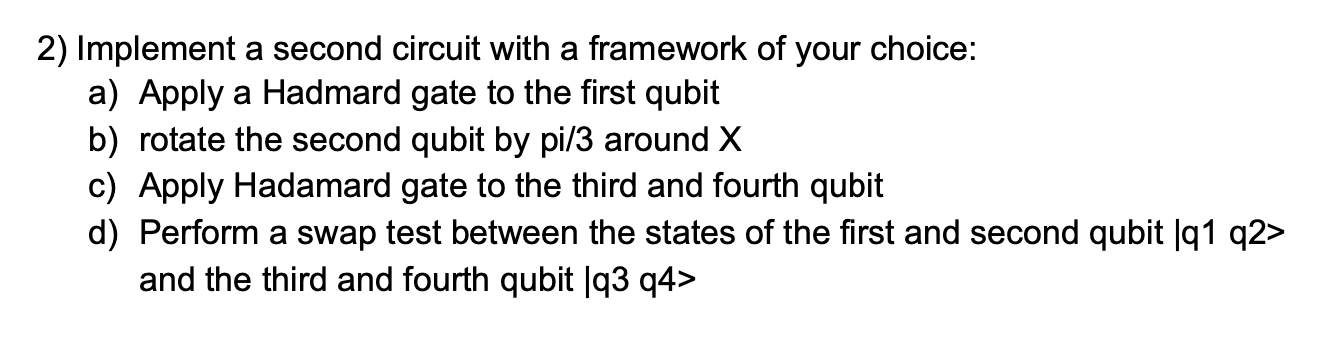

**Here the first qubit is q0, second qubit is q1 and so on**

I have completed this task in 2 ways:
 - One is applying Swap test on both pairs individually
 - Following Multi-state Swap Test Algorithm

In [ ]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, transpile
import numpy as np

## Swap Test  between the states of |q0 q1> and |q2 q3> (individual test)

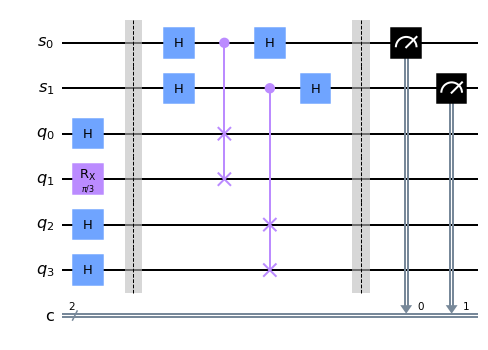

In [ ]:
s = QuantumRegister(2, 's')
qubits = QuantumRegister(4, 'q')
cr = ClassicalRegister(2, 'c')
qc = QuantumCircuit(s, qubits, cr)

# apply a Hadmard gate to the first qubit
qc.h(qubits[0])

# rotate the second qubit by pi/3 around X
qc.rx(np.pi / 3, qubits[1])

# Apply Hadamard gate to the third and fourth qubit
qc.h(qubits[2:4])

qc.barrier()

# SWAP test on pairs individually
qc.h(s)
qc.cswap(s[0], qubits[0], qubits[1])
qc.cswap(s[1], qubits[2], qubits[3])
qc.h(s)

qc.barrier()
qc.measure(s, cr)

qc.draw('mpl')

In [ ]:
shots = 1000
simulator = Aer.get_backend('qasm_simulator')
result = simulator.run(qc, shots=shots).result()
counts = result.get_counts()
counts

{'00': 735, '01': 265}

In [ ]:
# for s0
zeros = (counts['00'] if '00' in counts else 0) + (counts['10'] if '10' in counts else 0)
ones = (counts['01'] if '01' in counts else 0) + (counts['11'] if '11' in counts else 0)
s = 1-(2/shots)*(ones)
print(f"For s0 (q0,q1) :- \n \t count of 0: {zeros} , count of 1: {ones} \n \t Inner Product/Overlap: {s}")

# for s1
zeros = (counts['00'] if '00' in counts else 0) + (counts['01'] if '01' in counts else 0)
ones = (counts['11'] if '11' in counts else 0) + (counts['10'] if '10' in counts else 0)
s = 1-(2/shots)*(ones)

print(f"For s1 (q2,q3) :- \n \t count of 0: {zeros} , count of 1: {ones} \n \t Inner Product/Overlap: {s}")

For s0 (q0,q1) :- 
 	 count of 0: 735 , count of 1: 265 
 	 Inner Product/Overlap: 0.47
For s1 (q2,q3) :- 
 	 count of 0: 1000 , count of 1: 0 
 	 Inner Product/Overlap: 1.0


## Following Multi-state Swap Test algorithm

Ref: [Multi-state Swap Test Algorithm](https://arxiv.org/pdf/2205.07171.pdf)

Here the first qubit is q0, second qubit is q1 and so on


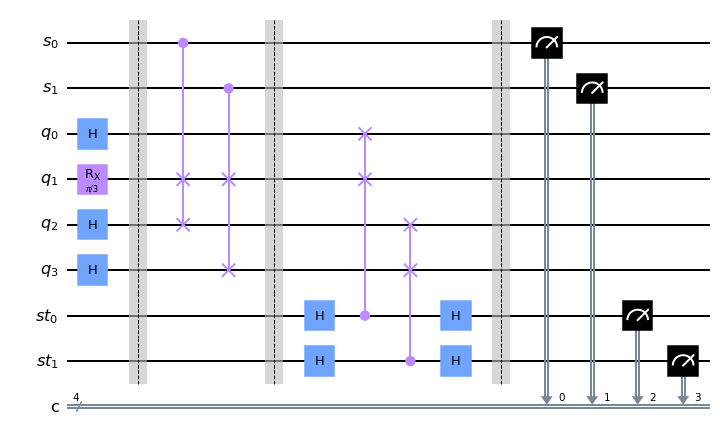

In [ ]:
s = QuantumRegister(2, 's')
print("Here the first qubit is q0, second qubit is q1 and so on")
qubits = QuantumRegister(4, 'q')
cr = ClassicalRegister(4, 'c')
st  = QuantumRegister(2, 'st')
qc = QuantumCircuit(s, qubits, cr,st)


# apply a Hadmard gate to the first qubit
qc.h(qubits[0])

# rotate the second qubit by pi/3 around X
qc.rx(np.pi / 3, qubits[1])

# Apply Hadamard gate to the third and fourth qubit
qc.h(qubits[2:4])

qc.barrier()

qc.cswap(s[0], qubits[1], qubits[2])
qc.cswap(s[1], qubits[1], qubits[3])

qc.barrier()

# Swap Test
qc.h(st[0])
qc.h(st[1])
qc.cswap(st[0], qubits[0], qubits[1])
qc.cswap(st[1], qubits[2], qubits[3])

qc.h(st[0])
qc.h(st[1])

qc.barrier()

qc.measure(s, cr[:2])
qc.measure(st, cr[2:])



qc.draw('mpl')

In [ ]:
simulator = Aer.get_backend('qasm_simulator')
qc = transpile(qc, simulator)

shots = 1000
result = simulator.run(qc, shots=shots).result()
counts = result.get_counts()
counts

{'0100': 221, '0000': 779}

Here s1s2 = |00> . Following calculatin is done without considering other cases

In [ ]:
# for st0
zeros = (counts['0000'] if '0000' in counts else 0) + (counts['1000'] if '1000' in counts else 0)
ones = (counts['0100'] if '0100' in counts else 0) + (counts['1000'] if '1100' in counts else 0)

s = (2* zeros/shots) - 1

print(f"For st0 (q0,q1) :- \n \t count of 0: {zeros} , count of 1: {ones} \n \t Inner Product/Overlap: {s}")

# for st1
zeros = (counts['0000'] if '0000' in counts else 0) + (counts['0100'] if '0100' in counts else 0)
ones = (counts['1100'] if '1100' in counts else 0) + (counts['1000'] if '1000' in counts else 0)
s = (2* zeros/shots) - 1

print(f"For st1 (q2,q3) :- \n \t count of 0: {zeros} , count of 1: {ones} \n \t Inner Product/Overlap: {s}")

For st0 (q0,q1) :- 
 	 count of 0: 779 , count of 1: 221 
 	 Inner Product/Overlap: 0.558
For st1 (q2,q3) :- 
 	 count of 0: 1000 , count of 1: 0 
 	 Inner Product/Overlap: 1.0
